# 02.图像加载和预处理

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

%matplotlib inline
import skimage
import skimage.io as io
import skimage.transform 
import sys
import numpy as np
import math
from matplotlib import pyplot
import matplotlib.image as mpimg
print("Required modules imported.")

Required modules imported.


## Caffe使用BGR的顺序

由于OpenCV在Caffe中的传统支持，并且它粗粝蓝绿红（BGR）顺序的图像，而不是更常用的红绿蓝（RGB）顺序，所以Cafffe2也期望BGR顺序。

Text(0.5,1,u'OpenCV, Caffe2 = BGR')

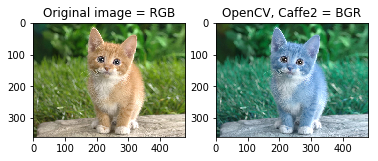

In [3]:
# You can load either local IMAGE_FILE or remote URL# You c 
# For Round 1 of this tutorial, try a local image.
IMAGE_LOCATION = 'images/cat.jpg'

img = skimage.img_as_float(skimage.io.imread(IMAGE_LOCATION)).astype(np.float32)

# test color reading
# show the original image
pyplot.figure()
pyplot.subplot(1,2,1)
pyplot.imshow(img)
pyplot.axis('on')
pyplot.title('Original image = RGB')

# show the image in BGR - just doing RGB->BGR temporarily for display
imgBGR = img[:, :, (2, 1, 0)]
#pyplot.figure()
pyplot.subplot(1,2,2)
pyplot.imshow(imgBGR)
pyplot.axis('on')
pyplot.title('OpenCV, Caffe2 = BGR')

## Caffe喜欢CHW顺序

- H：Height
- W：Width
- C：Channel（as in color）


Text(0.5,1,u'Mirror image')

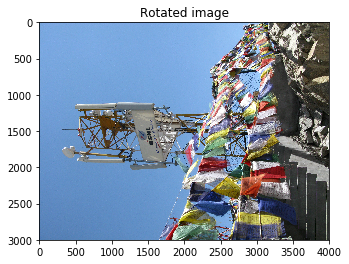

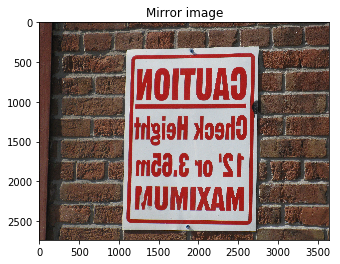

In [5]:
# Image came in sideways - it should be a portait image!
# How you detect this depends on the platform
# Could be a flag from the camera object
# Could be in the EXIF data
# ROTATED_IMAGE = "https://upload.wikimedia.org/wikipedia/commons/8/87/Cell_Phone_Tower_in_Ladakh_India_with_Buddhist_Prayer_Flags.jpg"
ROTATED_IMAGE = "images/cell-tower.jpg"
imgRotated = skimage.img_as_float(skimage.io.imread(ROTATED_IMAGE)).astype(np.float32)
pyplot.figure()
pyplot.imshow(imgRotated)
pyplot.axis('on')
pyplot.title('Rotated image')

# Image came in flipped or mirrored - text is backwards!
# Again detection depends on the platform
# This one is intended to be read by drivers in their rear-view mirror
# MIRROR_IMAGE = "https://upload.wikimedia.org/wikipedia/commons/2/27/Mirror_image_sign_to_be_read_by_drivers_who_are_backing_up_-b.JPG"
MIRROR_IMAGE = "images/mirror-image.jpg"
imgMirror = skimage.img_as_float(skimage.io.imread(MIRROR_IMAGE)).astype(np.float32)
pyplot.figure()
pyplot.imshow(imgMirror)
pyplot.axis('on')
pyplot.title('Mirror image')

## 图像处理操作

### 镜像

Text(0.5,1,u'Mirror image')

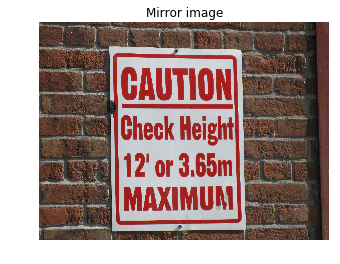

In [7]:
# Run me to flip the image back and forth
imgMirror = np.fliplr(imgMirror)
pyplot.figure()
pyplot.imshow(imgMirror)
pyplot.axis('off')
pyplot.title('Mirror image')

### 旋转

Text(0.5,1,u'Rotated image')

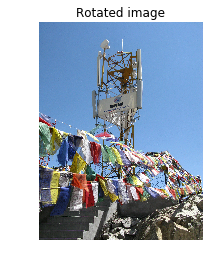

In [8]:
# Run me to rotate the image 90 degrees
imgRotated = np.rot90(imgRotated, 3)
pyplot.figure()
pyplot.imshow(imgRotated)
pyplot.axis('off')
pyplot.title('Rotated image')

### 调整

Original image's shape is 360x480
Model's input shape is 224x224
New image shape:(256, 256, 3)


/home/tianliang/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


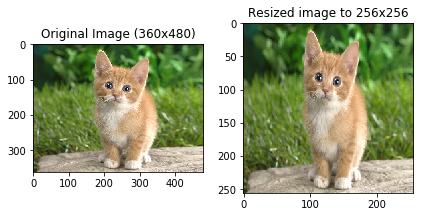

In [9]:
# Model is expecting 224 x 224, so resize/crop needed.
# First, let's resize the image to 256*256
orig_h, orig_w, _ = img.shape
print("Original image's shape is {}x{}".format(orig_h, orig_w))
input_height, input_width = 224, 224
print("Model's input shape is {}x{}".format(input_height, input_width))
img256 = skimage.transform.resize(img, (256, 256))

# Plot original and resized images for comparison
f, axarr = pyplot.subplots(1,2)
axarr[0].imshow(img)
axarr[0].set_title("Original Image (" + str(orig_h) + "x" + str(orig_w) + ")")
axarr[0].axis('on')
axarr[1].imshow(img256)
axarr[1].axis('on')
axarr[1].set_title('Resized image to 256x256')
pyplot.tight_layout()

print("New image shape:" + str(img256.shape))

### 重新缩放（Rescaling）

Original image shape:(360, 480, 3) and remember it should be in H, W, C!
Model's input shape is 224x224
Orginal aspect ratio: 1.33333333333
New image shape:(224, 298, 3) in HWC


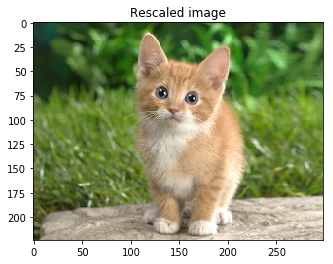

In [13]:
print("Original image shape:" + str(img.shape) + " and remember it should be in H, W, C!")
print("Model's input shape is {}x{}".format(input_height, input_width))
aspect = img.shape[1]/float(img.shape[0])
print("Orginal aspect ratio: " + str(aspect))
if(aspect>1):
    # landscape orientation - wide image
    res = int(aspect * input_height)
    imgScaled = skimage.transform.resize(img, (input_height, res))
if(aspect<1):
    # portrait orientation - tall image
    res = int(input_width/aspect)
    imgScaled = skimage.transform.resize(img, (res, input_width))
if(aspect == 1):
    imgScaled = skimage.transform.resize(img, (input_height, input_width))
pyplot.figure()
pyplot.imshow(imgScaled)
pyplot.axis('on')
pyplot.title('Rescaled image')
print("New image shape:" + str(imgScaled.shape) + " in HWC")

### 裁剪

Original image shape:(360, 480, 3) and remember it should be in H, W, C!


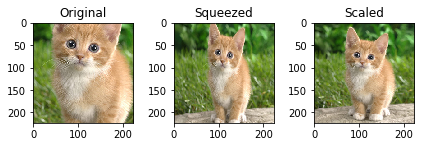

In [15]:
# Compare the images and cropping strategies
# Try a center crop on the original for giggles
print("Original image shape:" + str(img.shape) + " and remember it should be in H, W, C!")
def crop_center(img,cropx,cropy):
    y,x,c = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]
# yes, the function above should match resize and take a tuple...

pyplot.figure()
# Original image
imgCenter = crop_center(img,224,224)
pyplot.subplot(1,3,1)
pyplot.imshow(imgCenter)
pyplot.axis('on')
pyplot.title('Original')

# Now let's see what this does on the distorted image
img256Center = crop_center(img256,224,224)
pyplot.subplot(1,3,2)
pyplot.imshow(img256Center)
pyplot.axis('on')
pyplot.title('Squeezed')

# Scaled image
imgScaledCenter = crop_center(imgScaled,224,224)
pyplot.subplot(1,3,3)
pyplot.imshow(imgScaledCenter)
pyplot.axis('on')
pyplot.title('Scaled')

pyplot.tight_layout()

### 上采样

Original image shape:  (128, 128, 4)
Upscaled image shape:  (224, 224, 4)


Text(0.5,1,u'224x224')

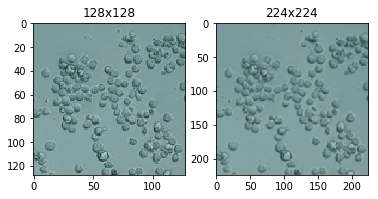

In [16]:
imgTiny = "images/Cellsx128.png"
imgTiny = skimage.img_as_float(skimage.io.imread(imgTiny)).astype(np.float32)
print("Original image shape: ", imgTiny.shape)
imgTiny224 = skimage.transform.resize(imgTiny, (224, 224))
print("Upscaled image shape: ", imgTiny224.shape)
# Plot original
pyplot.figure()
pyplot.subplot(1, 2, 1)
pyplot.imshow(imgTiny)
pyplot.axis('on')
pyplot.title('128x128')
# Plot upscaled
pyplot.subplot(1, 2, 2)
pyplot.imshow(imgTiny224)
pyplot.axis('on')
pyplot.title('224x224')

PNG格式图像是4个通道。

Slice image shape:  (56, 128, 4)
Upscaled slice image shape:  (224, 224, 4)


Text(0.5,1,u'224x224')

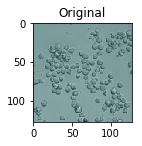

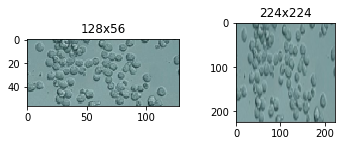

In [19]:
imgTiny = "images/Cellsx128.png"
imgTiny = skimage.img_as_float(skimage.io.imread(imgTiny)).astype(np.float32)
imgTinySlice = crop_center(imgTiny, 128, 56)
# Plot original
pyplot.figure()
pyplot.subplot(2, 1, 1)
pyplot.imshow(imgTiny)
pyplot.axis('on')
pyplot.title('Original')
# Plot slice
pyplot.figure()
pyplot.subplot(2, 2, 1)
pyplot.imshow(imgTinySlice)
pyplot.axis('on')
pyplot.title('128x56')
# Upscale?
print("Slice image shape: ", imgTinySlice.shape)
imgTiny224 = skimage.transform.resize(imgTinySlice, (224, 224))
print("Upscaled slice image shape: ", imgTiny224.shape)
# Plot upscaled
pyplot.subplot(2, 2, 2)
pyplot.imshow(imgTiny224)
pyplot.axis('on')
pyplot.title('224x224')

## 最终处理和批处理

我们首先将图像的数据顺序切换到BGR，然后重新编码用于GPU处理的列（HWC->CHW），然后向图像添加第四维(N)，表示图像的数量。最终的顺序是：N，C，H，W。

Image shape before HWC --> CHW conversion:  (224, 224, 3)
Image shape after HWC --> CHW conversion:  (3, 224, 224)
Image shape after BGR conversion:  (3, 224, 224)
Final input shape is: (1, 3, 224, 224)


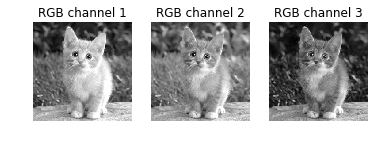

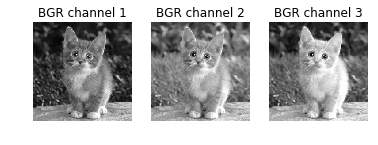

In [17]:
# This next line helps with being able to rerun this section
# if you want to try the outputs of the different crop strategies above
# swap out imgScaled with img (original) or img256 (squeezed)
imgCropped = crop_center(imgScaled,224,224)
print("Image shape before HWC --> CHW conversion: ", imgCropped.shape)
# (1) Since Caffe expects CHW order and the current image is HWC,
#     we will need to change the order.
imgCropped = imgCropped.swapaxes(1, 2).swapaxes(0, 1)
print("Image shape after HWC --> CHW conversion: ", imgCropped.shape)

pyplot.figure()
for i in range(3):
    # For some reason, pyplot subplot follows Matlab's indexing
    # convention (starting with 1). Well, we'll just follow it...
    pyplot.subplot(1, 3, i+1)
    pyplot.imshow(imgCropped[i], cmap=pyplot.cm.gray)
    pyplot.axis('off')
    pyplot.title('RGB channel %d' % (i+1))

# (2) Caffe uses a BGR order due to legacy OpenCV issues, so we
#     will change RGB to BGR.
imgCropped = imgCropped[(2, 1, 0), :, :]
print("Image shape after BGR conversion: ", imgCropped.shape)

# for discussion later - not helpful at this point
# (3) (Optional) We will subtract the mean image. Note that skimage loads
#     image in the [0, 1] range so we multiply the pixel values
#     first to get them into [0, 255].
#mean_file = os.path.join(CAFFE_ROOT, 'python/caffe/imagenet/ilsvrc_2012_mean.npy')
#mean = np.load(mean_file).mean(1).mean(1)
#img = img * 255 - mean[:, np.newaxis, np.newaxis]

pyplot.figure()
for i in range(3):
    # For some reason, pyplot subplot follows Matlab's indexing
    # convention (starting with 1). Well, we'll just follow it...
    pyplot.subplot(1, 3, i+1)
    pyplot.imshow(imgCropped[i], cmap=pyplot.cm.gray)
    pyplot.axis('off')
    pyplot.title('BGR channel %d' % (i+1))
# (4) Finally, since caffe2 expect the input to have a batch term
#     so we can feed in multiple images, we will simply prepend a
#     batch dimension of size 1. Also, we will make sure image is
#     of type np.float32.
imgCropped = imgCropped[np.newaxis, :, :, :].astype(np.float32)
print('Final input shape is:', imgCropped.shape)